In [0]:
# we will start by installing then importing the relevant Python libraries
!pip install numpy
!pip install pandas
!pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in the data as pandas dataframes
#.sort_values(0) sorts ascending
fileName='https://raw.githubusercontent.com/prashansa/implementAI-CAEchallenge/master/CAE_dataset.csv'
df = pd.read_csv(fileName)
#df[0:5]
df.info()
                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385768 entries, 0 to 385767
Data columns (total 13 columns):
Unnamed: 0    385768 non-null int64
0             383289 non-null float64
1             383289 non-null float64
2             383289 non-null float64
3             383289 non-null float64
4             383245 non-null float64
5             383289 non-null float64
6             383289 non-null float64
7             383289 non-null float64
8             383289 non-null float64
9             383287 non-null float64
label         385768 non-null int64
Id            385768 non-null int64
dtypes: float64(10), int64(3)
memory usage: 38.3 MB


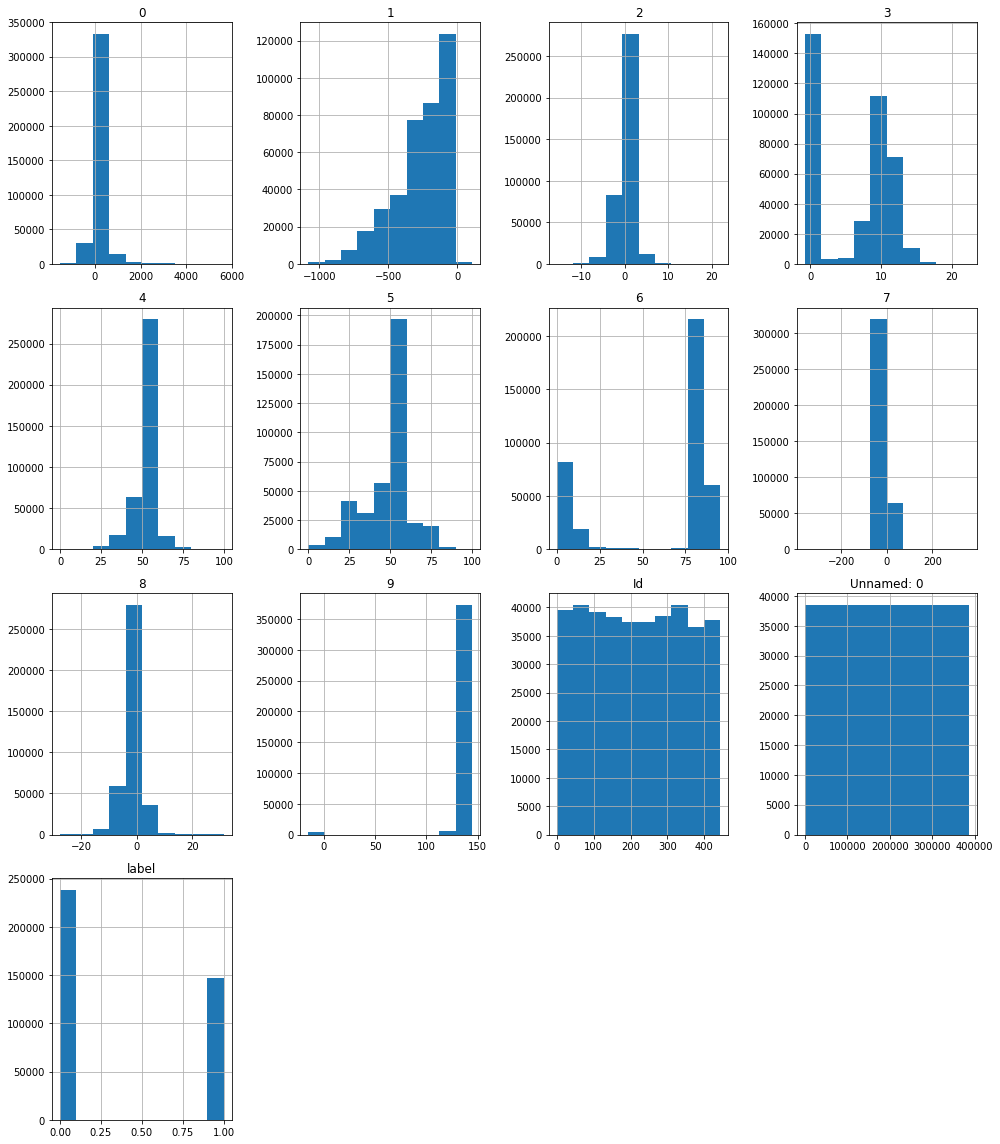

In [0]:
df.hist(figsize = (14,16))
plt.tight_layout()

In [0]:
df = df.fillna(df.mean())


/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


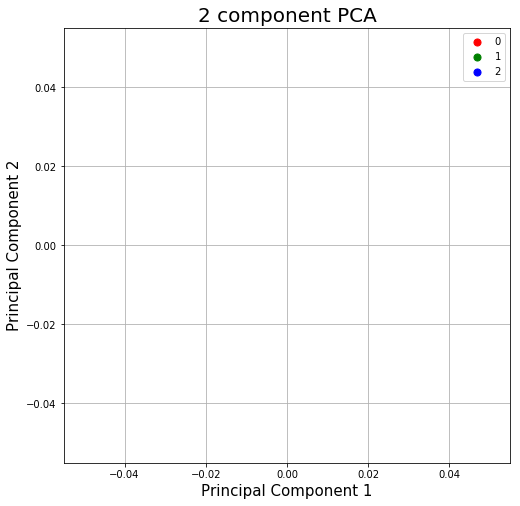

In [0]:
features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

x = df.loc[:, features].values
y = df.loc[:,['label']].values

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['label']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1', '2']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()